In [684]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE

from sklearn import metrics

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import precision_recall_curve


pd.set_option('display.max_columns', 100)

import warnings
warnings.filterwarnings('ignore')

## 1. Read Lead data

In [685]:
# Importing all datasets
lead = pd.read_csv("leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [686]:
# check the dimensions of the dataframe
lead.shape

(9240, 37)

In [687]:
# look at the statistical aspects of the dataframe
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [688]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [689]:
# missing values
round(100*(lead.isnull().sum())/len(lead), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

# Data Cleaning
- findout the select values in all the categorical columns
- Drop Columns having morethen 40%
- Identify high % of categorical columns having unique category in grater %

In [690]:
# Replace columns values 'select' to NA
lead['Specialization'] = lead['Specialization'].replace('Select', np.nan)
lead['How did you hear about X Education'] = lead['How did you hear about X Education'].replace('Select', np.nan)
lead['Lead Profile'] = lead['Lead Profile'].replace('Select', np.nan)
lead['City'] = lead['City'].replace('Select', np.nan)

In [691]:
# missing values
round(100*(lead.isnull().sum())/len(lead), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [692]:
# Drop the columns having >40% null values
lead.drop(lead.columns[lead.isnull().mean() > 0.4], axis = 1, inplace = True)

In [693]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [694]:
round(100*(lead["Do Not Email"].value_counts())/len(lead), 2)


No     92.06
Yes     7.94
Name: Do Not Email, dtype: float64

### Droping all the columns having all data align to unique category.

In [695]:
# Droping all the columns having more then 80% unique category.
lead.drop(["Do Not Email", "Do Not Call", "Country", "What is your current occupation", "What matters most to you in choosing a course", "Search", "Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations", "Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque"], axis=1, inplace=True)



In [696]:
# missing values
round(100*(lead.isnull().sum())/len(lead), 2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            36.58
Tags                                      36.29
City                                      39.71
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

#### Replace `google` to `Google` from Lead Source column

In [697]:
lead["Lead Source"] = lead["Lead Source"].replace('google', 'Google')

In [698]:
# Renamigin "Other" which are having less then 10%
round(100*(lead["Tags"].value_counts())/len(lead), 2)

Will revert after reading the email                  22.42
Ringing                                              13.02
Interested in other courses                           5.55
Already a student                                     5.03
Closed by Horizzon                                    3.87
switched off                                          2.60
Busy                                                  2.01
Lost to EINS                                          1.89
Not doing further education                           1.57
Interested  in full time MBA                          1.27
Graduation in progress                                1.20
invalid number                                        0.90
Diploma holder (Not Eligible)                         0.68
wrong number given                                    0.51
opp hangup                                            0.36
number not provided                                   0.29
in touch with EINS                                    0.

- Renamigin "Other" which are having `Lead Origin` less then 10%
- Renamigin "Other" which are having `Lead Source` less then 1%
- Renamigin "Other" which are having `Last Activity` less then 2%
- Renamigin "Other" which are having `Specialization` less then 2%
- Renamigin "Other" which are having `Tags` less then 5%
- Renamigin "Other" which are having `City` less then 8%
- Renamigin "Other" which are having `Last Notable Activity` less then 5%

In [699]:
inneed = lead['Lead Origin'].value_counts()/len(lead) > 0.1
inneed = inneed[inneed].index
lead['Lead Origin'] = np.where(lead['Lead Origin'].isin(inneed), lead['Lead Origin'], 'Other_Lead_Origin')


# - Renamigin "Other" which are having `Lead Source` less then 1%
inneed = lead['Lead Source'].value_counts()/len(lead) > 0.01
inneed = inneed[inneed].index
lead['Lead Source'] = np.where(lead['Lead Source'].isin(inneed), lead['Lead Source'], 'Other_Lead_Source')


# - Renamigin "Other" which are having `Last Activity` less then 2%
inneed = lead['Last Activity'].value_counts()/len(lead) > 0.02
inneed = inneed[inneed].index
lead['Last Activity'] = np.where(lead['Last Activity'].isin(inneed), lead['Last Activity'], 'Other_Last_Activity')


# - Renamigin "Other" which are having `Specialization` less then 2%
inneed = lead['Specialization'].value_counts()/len(lead) > 0.02
inneed = inneed[inneed].index
lead['Specialization'] = np.where(lead['Specialization'].isin(inneed), lead['Specialization'], 'Other_Specialization')


# - Renamigin "Other" which are having `Tags` less then 5%
inneed = lead['Tags'].value_counts()/len(lead) > 0.05
inneed = inneed[inneed].index
lead['Tags'] = np.where(lead['Tags'].isin(inneed), lead['Tags'], 'Tags_Other')

# - Renamigin "Other" which are having `City` less then 8%
inneed = lead['City'].value_counts()/len(lead) > 0.08
inneed = inneed[inneed].index
lead['City'] = np.where(lead['City'].isin(inneed), lead['City'], 'Other_City')


# - Renamigin "Other" which are having `Last Notable Activity` less then 5%
inneed = lead['Last Notable Activity'].value_counts()/len(lead) > 0.05
inneed = inneed[inneed].index
lead['Last Notable Activity'] = np.where(lead['Last Notable Activity'].isin(inneed), lead['Last Notable Activity'], 'Other_Last_Notable_Activity')




In [700]:
# missing values
round(100*(lead.isnull().sum())/len(lead), 2)

Prospect ID                               0.00
Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             0.00
Specialization                            0.00
Tags                                      0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [701]:
lead["Page Views Per Visit"].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

- Impute the null columns with mean since both the columns `[TotalVisits, Page Views Per Visit]` having approx same mean and median

In [702]:
lead['TotalVisits'].fillna((lead['TotalVisits'].mean()), inplace=True)
lead['Page Views Per Visit'].fillna((lead['Page Views Per Visit'].mean()), inplace=True)

### Check the missing value in data frame

In [703]:
# missing values
round(100*(lead.isnull().sum())/len(lead), 2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [704]:
lead.shape

(9240, 14)

#### Checking for Outliers in continuous

In [705]:
# Checking for outliers in the continuous variables
num_lead = lead[['Lead Number','TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [706]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_lead.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,3.445238,487.698268,2.362820
std,23405.995698,4.818723,548.021466,2.145333
min,579533.000000,0.000000,0.000000,0.000000
25%,596484.500000,1.000000,12.000000,1.000000
50%,615479.000000,3.000000,248.000000,2.000000
75%,637387.250000,5.000000,936.000000,3.000000
90%,650506.100000,7.000000,1380.000000,5.000000
95%,655404.050000,10.000000,1562.000000,6.000000
99%,659592.980000,17.000000,1840.610000,9.000000


### the correlation matrix 

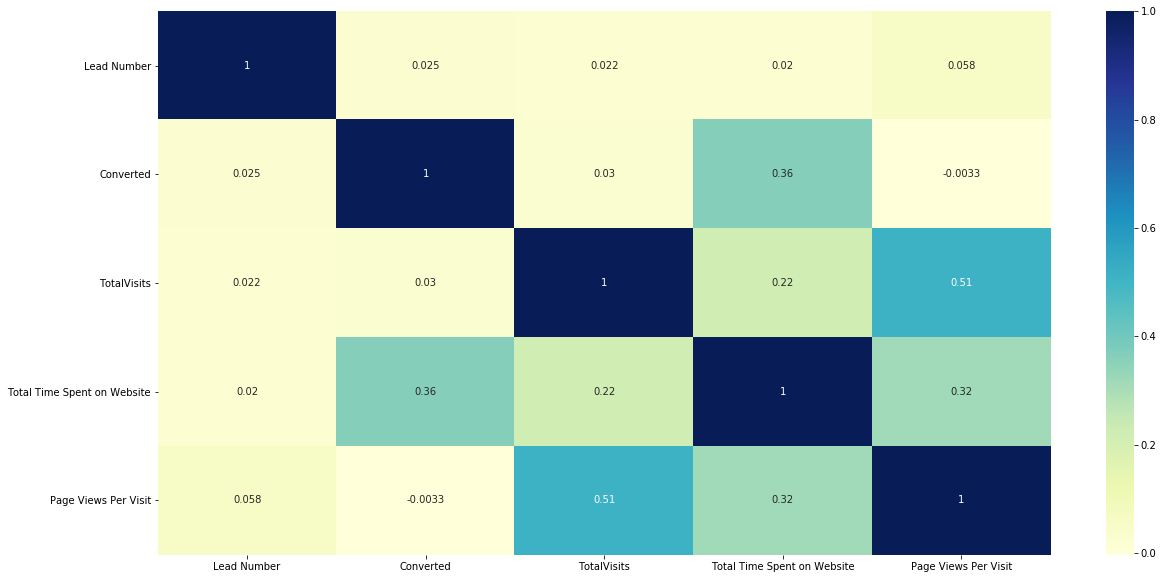

In [707]:
# the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure BuGn, RdBu, YlGnBu, coolwarm
sns.heatmap(lead.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [708]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Interested in other courses,Other_City,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Other_Specialization,Ringing,Other_City,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other_Last_Activity,Media and Advertising,Ringing,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Will revert after reading the email,Mumbai,No,Modified


## Data Preparation

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [709]:
# droup tag because it enter by sale teams
lead.drop('Tags',axis=1, inplace=True);
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Other_City,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Other_Specialization,Other_City,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other_Last_Activity,Media and Advertising,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Mumbai,No,Modified


In [710]:
# Get dummy for catergorical column
dummy1 = pd.get_dummies(lead[['Lead Origin', 
                              'Lead Source',
                              'Last Activity', 
                              'Specialization',
                              'City',
                              'A free copy of Mastering The Interview',
                              'Last Notable Activity']], 
                        drop_first=True)
dummy1

,Lead Origin_Landing Page Submission,Lead Origin_Other_Lead_Origin,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other_Last_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Other_City,City_Thane & Outskirts,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Other_Last_Notable_Activity,Last Notable Activity_SMS Sent
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
9236,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
9237,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
9238,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [711]:
new_lead = pd.concat([lead, dummy1], axis=1)
new_lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Other_Lead_Origin,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other_Last_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Other_City,City_Thane & Outskirts,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Other_Last_Notable_Activity,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Other_City,No,Modified,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Other_Specialization,Other_City,No,Email Opened,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Mumbai,Yes,Email Opened,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other_Last_Activity,Media and Advertising,Mumbai,No,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Mumbai,No,Modified,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [712]:
# Drop the categoricol colum after dummy
new_lead.drop(['Lead Origin', 'Lead Source','Last Activity', 
                              'Specialization',
                              'City',
                              'A free copy of Mastering The Interview',
                              'Last Notable Activity'],inplace=True,axis=1)

In [713]:
new_lead.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Other_Lead_Origin,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other_Last_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Other_City,City_Thane & Outskirts,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Other_Last_Notable_Activity,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


## Test-Train Split

In [714]:
from sklearn.model_selection import train_test_split

In [715]:
# Putting feature variable to X
X = new_lead.drop(['Prospect ID','Lead Number','Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Other_Lead_Origin,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other_Last_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Other_City,City_Thane & Outskirts,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Other_Last_Notable_Activity,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
1,5.0,674,2.5,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,2.0,1428,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [716]:
# Putting response variable to y
y = new_lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [717]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [718]:
from sklearn.preprocessing import StandardScaler

In [719]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Other_Lead_Origin,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other_Last_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Other_City,City_Thane & Outskirts,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Other_Last_Notable_Activity,Last Notable Activity_SMS Sent
1871,-0.657764,-0.885371,-1.088305,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
6795,0.099483,0.005716,-0.473232,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
3516,0.288795,-0.691418,0.067847,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
8105,0.288795,1.365219,1.223999,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3934,-0.657764,-0.885371,-1.088305,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0


In [720]:
### Checking the conversion Rate
Converted = (sum(new_lead['Converted'])/len(new_lead['Converted'].index))*100
Converted

38.53896103896104

### Looking at Correlations

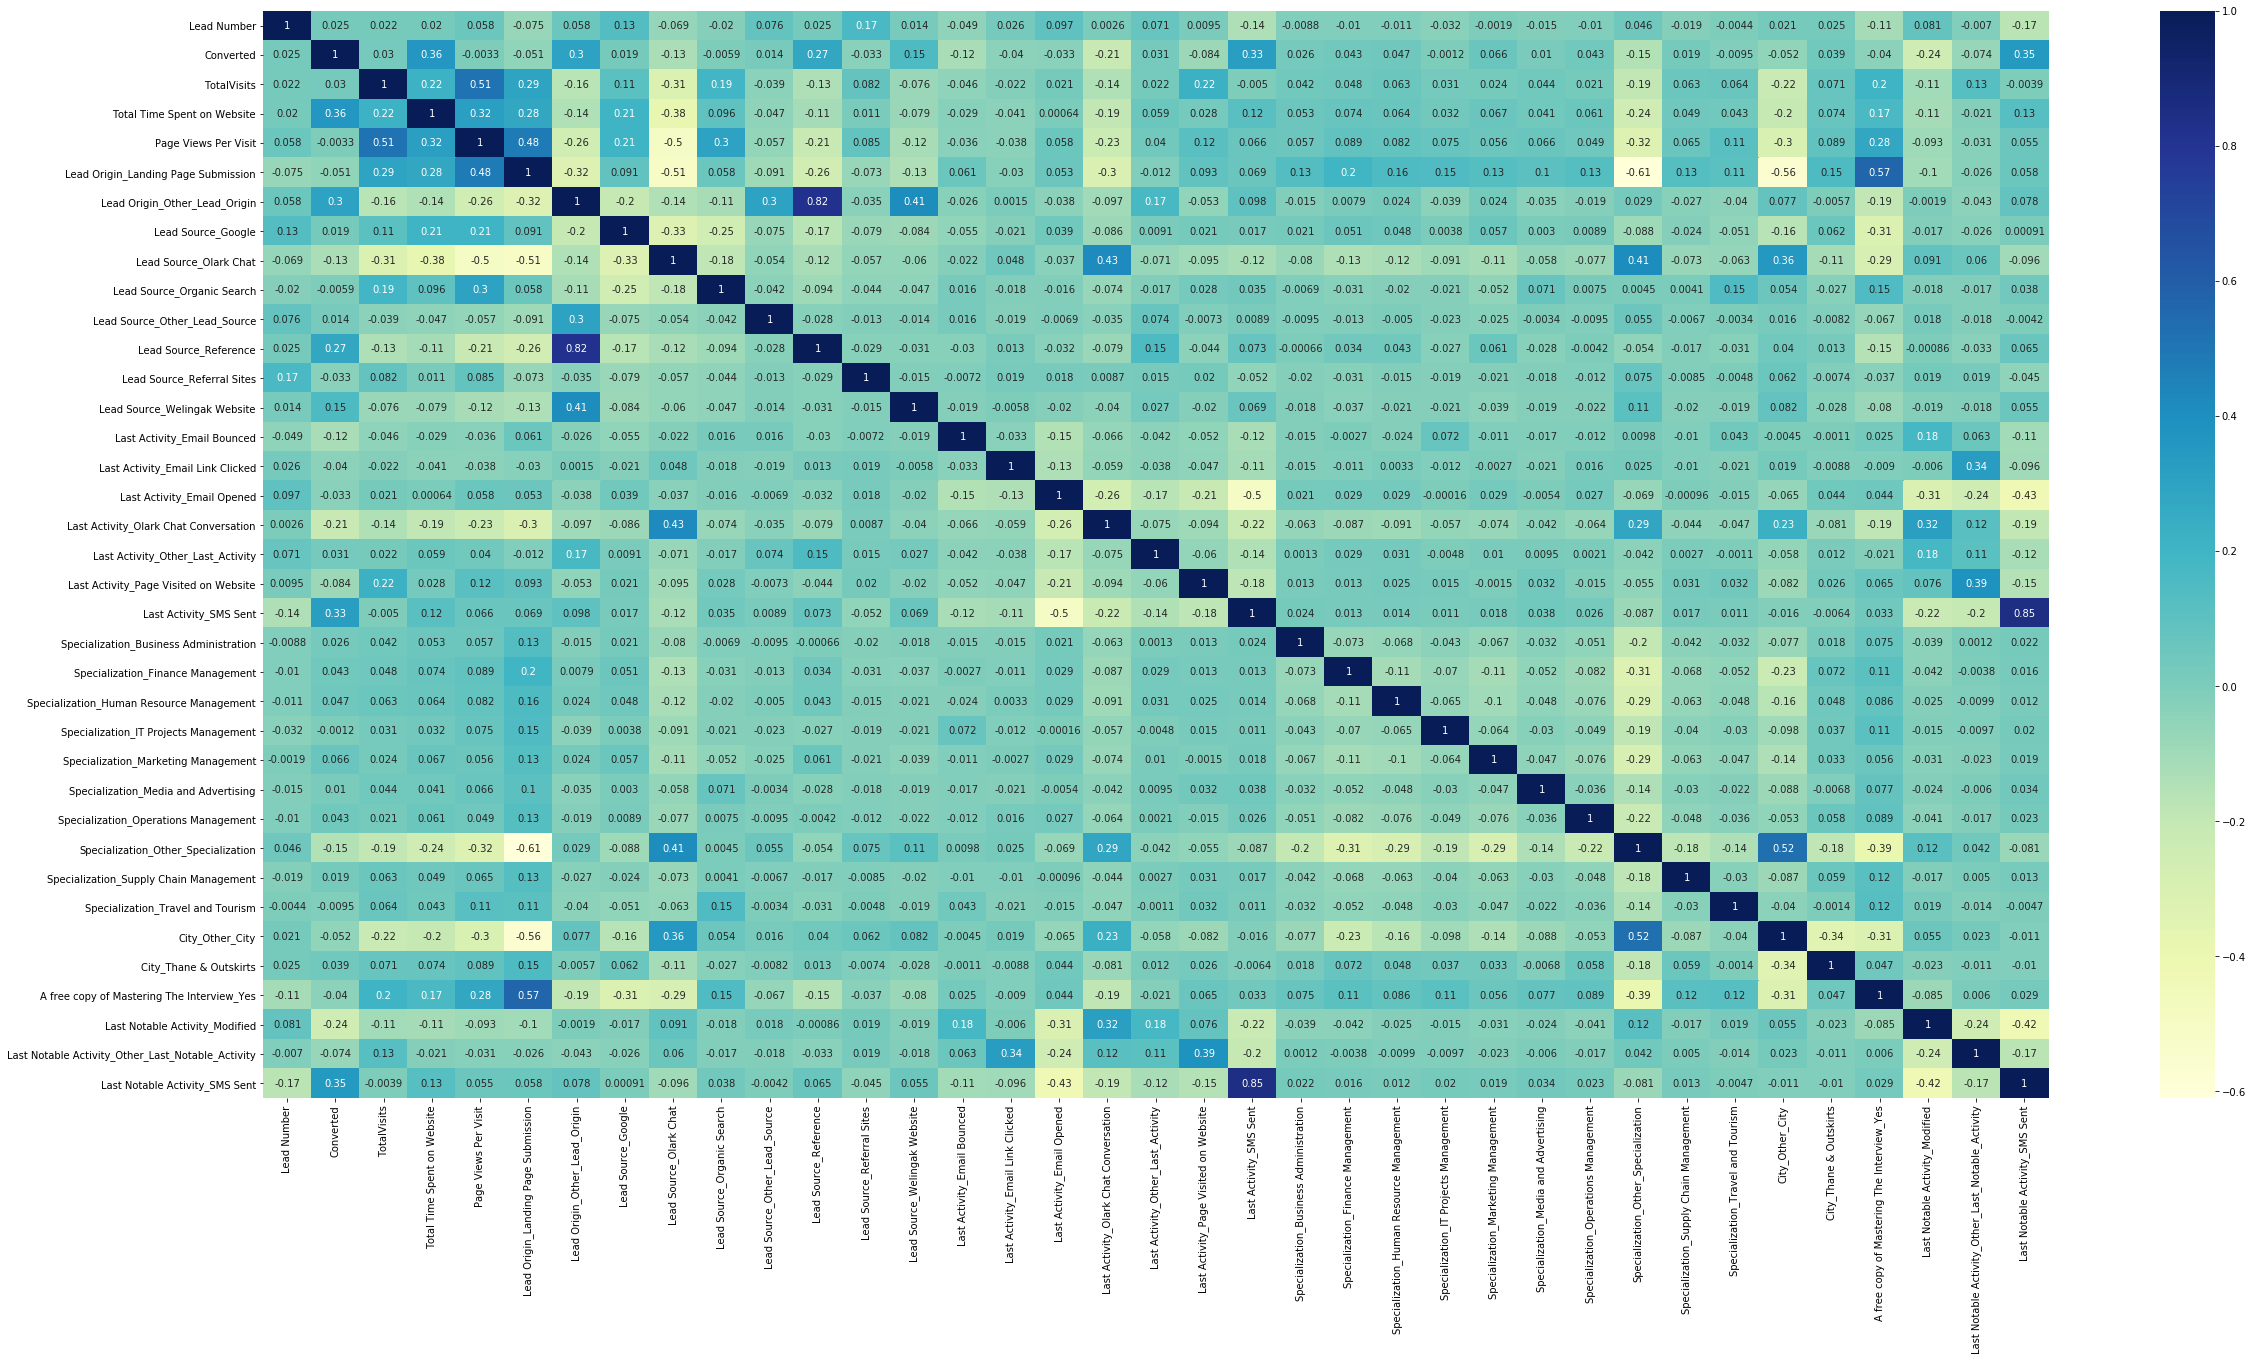

In [721]:
# correlation matrix 
plt.figure(figsize = (40,20))        # Size of the figure
sns.heatmap(new_lead.corr(),annot = True, cmap='YlGnBu')
plt.show()

## Model Building

### Feature Selection Using RFE¶

In [722]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [723]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 25)             # running RFE with 25 variables as output
rfe = rfe.fit(X_train, y_train)

In [724]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True, False,  True, False, False, False, False,  True,
       False, False,  True, False,  True,  True,  True,  True])

In [725]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Other_Lead_Origin', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Other_Lead_Source', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 8),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Last_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 4),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', True, 1),
 ('Specialization_Finance Management', False, 3),
 ('Specialization_Human Resource Management', True, 1),
 ('Specialization_IT Project

In [726]:
# supported column
col = X_train.columns[rfe.support_]

In [727]:
# Not supported
X_train.columns[~rfe.support_]

Index(['Last Activity_Email Link Clicked',
       'Last Activity_Page Visited on Website',
       'Specialization_Finance Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'City_Thane & Outskirts'],
      dtype='object')

#### Assessing the model with StatsModels

### Model: 1

In [728]:
# Model 1
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6442
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2824.4
Date:                Mon, 07 Sep 2020   Deviance:                       5648.8
Time:                        11:08:24   Pearson chi2:                 6.70e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [729]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.439829
6795    0.115005
3516    0.280408
8105    0.753275
3934    0.198398
4844    0.902418
3297    0.073963
8071    0.894881
987     0.162796
7423    0.924613
dtype: float64

In [730]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.43982923, 0.11500485, 0.28040788, 0.75327524, 0.19839789,
       0.90241824, 0.07396344, 0.89488117, 0.16279563, 0.92461274])

#### Creating a dataframe with the actual converted flag and the predicted probabilities

In [731]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID
0,0,0.439829,1871
1,0,0.115005,6795
2,0,0.280408,3516
3,0,0.753275,8105
4,0,0.198398,3934


#### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [732]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted
0,0,0.439829,1871,0
1,0,0.115005,6795,0
2,0,0.280408,3516,0
3,0,0.753275,8105,1
4,0,0.198398,3934,0


In [733]:
from sklearn import metrics

In [734]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3508  494]
 [ 776 1690]]


In [735]:
# Predicted     not_converted    converted
# Actual
# not_converted        3508      494
# converted            776       1690  

In [736]:
# Check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8036487322201608


#### Checking VIFs

In [737]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [738]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Other_Lead_Origin,38.42
9,Lead Source_Reference,28.30
24,Last Notable Activity_SMS Sent,7.50
11,Lead Source_Welingak Website,7.37
16,Last Activity_SMS Sent,7.20
3,Lead Origin_Landing Page Submission,5.43
13,Last Activity_Email Opened,4.70
8,Lead Source_Other_Lead_Source,4.69
22,Last Notable Activity_Modified,4.25
20,City_Other_City,3.60


There are a few variables with high p-values and VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex.

### Droping column `"Lead Source_Other_Lead_Source"` based on high `p-value`

In [739]:
# col = col.drop('Lead Origin_Other_Lead_Origin', 1)
col = col.drop('Lead Source_Other_Lead_Source', 1)
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Other_Lead_Origin',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Last_Activity', 'Last Activity_SMS Sent',
       'Specialization_Business Administration',
       'Specialization_Human Resource Management',
       'Specialization_Other_Specialization', 'City_Other_City',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Other_Last_Notable_Activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

### Model:2

In [740]:
# Re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6443
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2824.5
Date:                Mon, 07 Sep 2020   Deviance:                       5649.1
Time:                        11:09:57   Pearson chi2:                 6.70e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [741]:
# Reshape predicated value
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.4397038 , 0.11523795, 0.28041696, 0.75325909, 0.19821802,
       0.90314375, 0.07380911, 0.89534582, 0.16285441, 0.92454363])

In [742]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [743]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted
0,0,0.439704,1871,0
1,0,0.115238,6795,0
2,0,0.280417,3516,0
3,0,0.753259,8105,1
4,0,0.198218,3934,0


In [744]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8031849103277675


So overall the accuracy hasn't dropped much.

#### Let's check the VIFs again


In [745]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Other_Lead_Origin,9.13
23,Last Notable Activity_SMS Sent,7.50
15,Last Activity_SMS Sent,7.20
8,Lead Source_Reference,6.91
3,Lead Origin_Landing Page Submission,5.43
12,Last Activity_Email Opened,4.69
21,Last Notable Activity_Modified,4.24
19,City_Other_City,3.60
18,Specialization_Other_Specialization,3.50
6,Lead Source_Olark Chat,3.47


### Drop `"Lead Source_Referral Sites"` since it has a high `p-value`

In [746]:
# Drop `"Lead Source_Referral Sites"` since it has a high p-value
# col = col.drop('Last Notable Activity_SMS Sent')
col = col.drop('Lead Source_Referral Sites')
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Other_Lead_Origin',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Last_Activity', 'Last Activity_SMS Sent',
       'Specialization_Business Administration',
       'Specialization_Human Resource Management',
       'Specialization_Other_Specialization', 'City_Other_City',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Other_Last_Notable_Activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

### Model:3

In [747]:
# Re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2824.9
Date:                Mon, 07 Sep 2020   Deviance:                       5649.8
Time:                        11:11:42   Pearson chi2:                 6.69e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [748]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.43947237, 0.11598743, 0.28175496, 0.75249384, 0.19849247,
       0.90420968, 0.07313094, 0.89617639, 0.13479745, 0.92490381])

In [749]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [750]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted
0,0,0.439472,1871,0
1,0,0.115987,6795,0
2,0,0.281755,3516,0
3,0,0.752494,8105,1
4,0,0.198492,3934,0


In [751]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8036487322201608


So overall the accuracy hasn't dropped much.

#### Let's now check the VIFs again

In [752]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Other_Lead_Origin,9.09
22,Last Notable Activity_SMS Sent,7.43
14,Last Activity_SMS Sent,7.20
8,Lead Source_Reference,6.91
3,Lead Origin_Landing Page Submission,5.38
11,Last Activity_Email Opened,4.54
20,Last Notable Activity_Modified,4.14
18,City_Other_City,3.59
17,Specialization_Other_Specialization,3.49
6,Lead Source_Olark Chat,3.34


### drop `"A free copy of Mastering The Interview_Yes"` since it has a high `p-value`

In [753]:

# col = col.drop('Lead Origin_Landing Page Submission')
col = col.drop('A free copy of Mastering The Interview_Yes')
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Other_Lead_Origin',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Last_Activity', 'Last Activity_SMS Sent',
       'Specialization_Business Administration',
       'Specialization_Human Resource Management',
       'Specialization_Other_Specialization', 'City_Other_City',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Other_Last_Notable_Activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

### Model:4

In [754]:
# Re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2825.5
Date:                Mon, 07 Sep 2020   Deviance:                       5651.0
Time:                        11:12:29   Pearson chi2:                 6.68e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [755]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.43632982, 0.11991666, 0.28096419, 0.74887282, 0.1989803 ,
       0.89605234, 0.07642445, 0.8957536 , 0.12948244, 0.92583561])

In [756]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [757]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted
0,0,0.436330,1871,0
1,0,0.119917,6795,0
2,0,0.280964,3516,0
3,0,0.748873,8105,1
4,0,0.198980,3934,0


In [758]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8053494124922697


The accuracy is still practically the same.

#### Check the VIFs again


In [759]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Other_Lead_Origin,9.04
21,Last Notable Activity_SMS Sent,7.35
14,Last Activity_SMS Sent,7.17
8,Lead Source_Reference,6.91
3,Lead Origin_Landing Page Submission,4.48
11,Last Activity_Email Opened,4.31
19,Last Notable Activity_Modified,4.01
18,City_Other_City,3.58
17,Specialization_Other_Specialization,3.48
6,Lead Source_Olark Chat,3.24


### drop `"Specialization_Human Resource Management"` since it has a high `p-value`

In [761]:
col = col.drop('Specialization_Human Resource Management', 1)
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Other_Lead_Origin',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Last_Activity', 'Last Activity_SMS Sent',
       'Specialization_Business Administration',
       'Specialization_Other_Specialization', 'City_Other_City',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Other_Last_Notable_Activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

### Model: 5

In [762]:
# Re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2826.3
Date:                Mon, 07 Sep 2020   Deviance:                       5652.6
Time:                        11:15:19   Pearson chi2:                 6.68e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [763]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.42982546, 0.12010885, 0.28079257, 0.74826355, 0.19877968,
       0.89604069, 0.07655617, 0.89505141, 0.12966774, 0.92562943])

In [764]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [765]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted
0,0,0.429825,1871,0
1,0,0.120109,6795,0
2,0,0.280793,3516,0
3,0,0.748264,8105,1
4,0,0.198780,3934,0


In [766]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8039579468150897


### Check VIF

In [767]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Other_Lead_Origin,9.03
20,Last Notable Activity_SMS Sent,7.33
14,Last Activity_SMS Sent,7.17
8,Lead Source_Reference,6.91
3,Lead Origin_Landing Page Submission,4.46
11,Last Activity_Email Opened,4.26
18,Last Notable Activity_Modified,3.97
17,City_Other_City,3.58
16,Specialization_Other_Specialization,3.33
6,Lead Source_Olark Chat,3.23


### drop `"Specialization_Business Administration"` since it has a high `p-value`

In [768]:
col = col.drop('Specialization_Business Administration', 1)
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Other_Lead_Origin',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Last_Activity', 'Last Activity_SMS Sent',
       'Specialization_Other_Specialization', 'City_Other_City',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Other_Last_Notable_Activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

### Model: 6

In [769]:
# Re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2826.9
Date:                Mon, 07 Sep 2020   Deviance:                       5653.8
Time:                        11:19:28   Pearson chi2:                 6.68e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [770]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.42622434, 0.11998568, 0.28094885, 0.74835356, 0.19865826,
       0.91008042, 0.07664943, 0.90929971, 0.12984867, 0.92554575])

In [771]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [772]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted
0,0,0.426224,1871,0
1,0,0.119986,6795,0
2,0,0.280949,3516,0
3,0,0.748354,8105,1
4,0,0.198658,3934,0


In [773]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8036487322201608


### Check the VIF

In [774]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Other_Lead_Origin,9.03
19,Last Notable Activity_SMS Sent,7.32
14,Last Activity_SMS Sent,7.17
8,Lead Source_Reference,6.91
3,Lead Origin_Landing Page Submission,4.45
11,Last Activity_Email Opened,4.25
17,Last Notable Activity_Modified,3.96
16,City_Other_City,3.58
15,Specialization_Other_Specialization,3.26
6,Lead Source_Olark Chat,3.23


### drop `"City_Other_City"` since it has a high `p-value`

In [775]:
col = col.drop('City_Other_City', 1)
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Other_Lead_Origin',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Last_Activity', 'Last Activity_SMS Sent',
       'Specialization_Other_Specialization', 'Last Notable Activity_Modified',
       'Last Notable Activity_Other_Last_Notable_Activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

### Model: 7

In [776]:
# Re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2827.9
Date:                Mon, 07 Sep 2020   Deviance:                       5655.7
Time:                        11:23:01   Pearson chi2:                 6.68e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [777]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.43438977, 0.12542716, 0.28327038, 0.73831708, 0.2001027 ,
       0.90669366, 0.07159947, 0.91531641, 0.13090463, 0.92646343])

In [778]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [779]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted
0,0,0.434390,1871,0
1,0,0.125427,6795,0
2,0,0.283270,3516,0
3,0,0.738317,8105,1
4,0,0.200103,3934,0


In [780]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8050401978973407


### Check the VIF

In [781]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Other_Lead_Origin,9.03
18,Last Notable Activity_SMS Sent,7.18
14,Last Activity_SMS Sent,7.08
8,Lead Source_Reference,6.91
3,Lead Origin_Landing Page Submission,4.29
11,Last Activity_Email Opened,3.82
16,Last Notable Activity_Modified,3.78
6,Lead Source_Olark Chat,3.22
15,Specialization_Other_Specialization,2.91
9,Lead Source_Welingak Website,2.37


### drop `"Lead Origin_Other_Lead_Origin"` since it has a high `VIF`

In [782]:
col = col.drop('Lead Origin_Other_Lead_Origin', 1)
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Last_Activity', 'Last Activity_SMS Sent',
       'Specialization_Other_Specialization', 'Last Notable Activity_Modified',
       'Last Notable Activity_Other_Last_Notable_Activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

### Model: 8

In [783]:
# Re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2840.9
Date:                Mon, 07 Sep 2020   Deviance:                       5681.8
Time:                        11:26:03   Pearson chi2:                 6.64e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [784]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.43769729, 0.13215256, 0.27834691, 0.72232074, 0.20013222,
       0.90985782, 0.06955351, 0.91965371, 0.15177039, 0.9305136 ])

In [785]:
y_train_pred_final['Converted_Prob'] = y_train_pred
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted
0,0,0.437697,1871,0
1,0,0.132153,6795,0
2,0,0.278347,3516,0
3,0,0.722321,8105,1
4,0,0.200132,3934,0


In [786]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8022572665429808


### Check the VIF

In [787]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,Last Notable Activity_SMS Sent,7.16
13,Last Activity_SMS Sent,7.02
3,Lead Origin_Landing Page Submission,4.18
15,Last Notable Activity_Modified,3.73
10,Last Activity_Email Opened,3.67
5,Lead Source_Olark Chat,3.08
14,Specialization_Other_Specialization,2.91
4,Lead Source_Google,2.10
11,Last Activity_Olark Chat Conversation,1.93
2,Page Views Per Visit,1.92


### drop `"Lead Source_Organic Search"` since it has a high `p-value`

In [788]:
col = col.drop('Lead Source_Organic Search', 1)
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Last_Activity', 'Last Activity_SMS Sent',
       'Specialization_Other_Specialization', 'Last Notable Activity_Modified',
       'Last Notable Activity_Other_Last_Notable_Activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

### Model: 9

In [789]:
# Re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2841.8
Date:                Mon, 07 Sep 2020   Deviance:                       5683.5
Time:                        11:29:34   Pearson chi2:                 6.64e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [790]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.43586283, 0.13577316, 0.28232138, 0.72418686, 0.1996113 ,
       0.91234286, 0.06294931, 0.92057616, 0.1593122 , 0.93122146])

In [791]:
y_train_pred_final['Converted_Prob'] = y_train_pred
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted
0,0,0.435863,1871,0
1,0,0.135773,6795,0
2,0,0.282321,3516,0
3,0,0.724187,8105,1
4,0,0.199611,3934,0


In [792]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8021026592455164


### Check the VIF

In [793]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,Last Notable Activity_SMS Sent,7.05
12,Last Activity_SMS Sent,6.98
3,Lead Origin_Landing Page Submission,4.14
14,Last Notable Activity_Modified,3.56
9,Last Activity_Email Opened,3.42
5,Lead Source_Olark Chat,2.93
13,Specialization_Other_Specialization,2.86
10,Last Activity_Olark Chat Conversation,1.92
2,Page Views Per Visit,1.83
4,Lead Source_Google,1.79


### drop `"Last Notable Activity_SMS Sent"` since it has a high `VIF`

In [794]:
col = col.drop('Last Notable Activity_SMS Sent', 1)
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Last_Activity', 'Last Activity_SMS Sent',
       'Specialization_Other_Specialization', 'Last Notable Activity_Modified',
       'Last Notable Activity_Other_Last_Notable_Activity'],
      dtype='object')

### Model: 10

In [795]:
# Re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2859.9
Date:                Mon, 07 Sep 2020   Deviance:                       5719.8
Time:                        11:32:09   Pearson chi2:                 6.69e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [796]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.4599954 , 0.14783639, 0.30390587, 0.70044998, 0.13408874,
       0.90224486, 0.06880322, 0.9206498 , 0.16039815, 0.92330253])

In [797]:
y_train_pred_final['Converted_Prob'] = y_train_pred
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted
0,0,0.459995,1871,0
1,0,0.147836,6795,0
2,0,0.303906,3516,0
3,0,0.700450,8105,1
4,0,0.134089,3934,0


In [798]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8014842300556586


### Check the VIF

In [799]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,3.77
9,Last Activity_Email Opened,3.26
12,Last Activity_SMS Sent,2.90
5,Lead Source_Olark Chat,2.85
13,Specialization_Other_Specialization,2.72
14,Last Notable Activity_Modified,2.42
10,Last Activity_Olark Chat Conversation,1.88
2,Page Views Per Visit,1.83
4,Lead Source_Google,1.76
15,Last Notable Activity_Other_Last_Notable_Activity,1.60


### drop `"Last Notable Activity_Other_Last_Notable_Activity"` since it has a high `p-value`

In [800]:
col = col.drop('Last Notable Activity_Other_Last_Notable_Activity', 1)
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Last_Activity', 'Last Activity_SMS Sent',
       'Specialization_Other_Specialization',
       'Last Notable Activity_Modified'],
      dtype='object')

### Model: 11

In [801]:
# Re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2860.0
Date:                Mon, 07 Sep 2020   Deviance:                       5719.9
Time:                        11:35:14   Pearson chi2:                 6.69e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [802]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.45898046, 0.1474317 , 0.30271763, 0.69953282, 0.13618597,
       0.90185264, 0.0685618 , 0.91932775, 0.15742841, 0.92294486])

In [803]:
y_train_pred_final['Converted_Prob'] = y_train_pred
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted
0,0,0.458980,1871,0
1,0,0.147432,6795,0
2,0,0.302718,3516,0
3,0,0.699533,8105,1
4,0,0.136186,3934,0


In [804]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.801948051948052


### Check the VIF

In [805]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,3.02
9,Last Activity_Email Opened,2.74
5,Lead Source_Olark Chat,2.68
12,Last Activity_SMS Sent,2.49
13,Specialization_Other_Specialization,2.45
14,Last Notable Activity_Modified,1.98
10,Last Activity_Olark Chat Conversation,1.88
2,Page Views Per Visit,1.82
4,Lead Source_Google,1.68
6,Lead Source_Reference,1.45


All variables have a good `p-value` and `VIF`. So we need not drop any more variables and we can proceed with making predictions using this model only

In [806]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3525,  477],
       [ 804, 1662]])

In [807]:
# Actual/Predicted     not_Converted    Converted
        # not_Converted        3507      495
        # Converted            788       1678 

### The overall model accuracy.

In [808]:
# the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.801948051948052

## Metrics beyond simply accuracy


In [809]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [810]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6739659367396593

In [811]:
# Let us calculate specificity
TN / float(TN+FP)

0.8808095952023988

In [812]:
# Calculate false postive rate - predicting Converted when customer does not have Converted
print(FP/ float(TN+FP))

0.1191904047976012


In [813]:
# positive predictive value 
print (TP / float(TP+FP))

0.7769985974754559


In [814]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8142758142758143


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [815]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [816]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted,
                                         y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

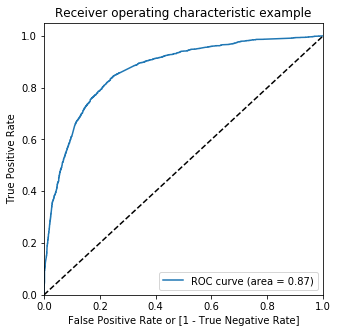

In [817]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

###  Finding Optimal Cutoff Point


Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [818]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.458980,1871,0,1,1,1,1,1,0,0,0,0,0
1,0,0.147432,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.302718,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.699533,8105,1,1,1,1,1,1,1,1,0,0,0
4,0,0.136186,3934,0,1,1,0,0,0,0,0,0,0,0


In [819]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.572511  0.969181  0.328086
0.2   0.2  0.714750  0.914842  0.591454
0.3   0.3  0.788033  0.840633  0.755622
0.4   0.4  0.801793  0.761963  0.826337
0.5   0.5  0.801948  0.673966  0.880810
0.6   0.6  0.781849  0.560827  0.918041
0.7   0.7  0.764842  0.477291  0.942029
0.8   0.8  0.737013  0.359286  0.969765
0.9   0.9  0.690476  0.209246  0.987006


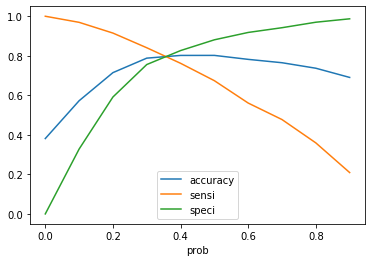

In [820]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.


In [821]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.458980,1871,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.147432,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.302718,3516,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.699533,8105,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.136186,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [822]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7880333951762524

In [823]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3024,  978],
       [ 393, 2073]])

In [824]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [825]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8406326034063261

In [826]:
# Let us calculate specificity
TN / float(TN+FP)

0.7556221889055472

In [827]:
# Calculate false postive rate - predicting Converted when customer does not have Converted
print(FP/ float(TN+FP))

0.24437781109445278


In [828]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6794493608652901


In [829]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8849868305531168


## Precision and Recall

##### Precision
TP / TP + FP

In [830]:
TP/(TP+FP)

0.6794493608652901

##### Recall
TP / TP + FN

In [831]:
TP/(TP+FN)

0.8406326034063261

In [832]:
from sklearn.metrics import precision_score, recall_score

In [833]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.6794493608652901

In [834]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8406326034063261

In [835]:
from sklearn.metrics import precision_recall_curve

In [836]:
y_train_pred_final

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.458980,1871,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.147432,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.302718,3516,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.699533,8105,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.136186,3934,0,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,1,0.291092,350,0,1,1,1,0,0,0,0,0,0,0,0
6464,1,0.908681,79,1,1,1,1,1,1,1,1,1,1,1,1
6465,1,0.264338,8039,0,1,1,1,0,0,0,0,0,0,0,0
6466,0,0.067696,6936,0,1,0,0,0,0,0,0,0,0,0,0


In [837]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

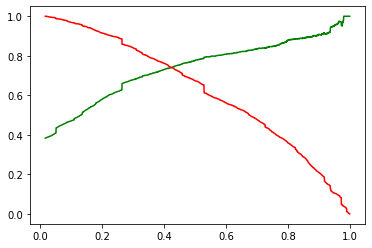

In [838]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [839]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[
    ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [840]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other_Last_Activity,Last Activity_SMS Sent,Specialization_Other_Specialization,Last Notable Activity_Modified
4269,0.856729,0.964504,2.611381,0,0,0,0,0,0,0,0,0,1,1,0
2376,-0.657764,-0.885371,-1.088305,0,0,0,1,0,0,0,0,0,1,1,0
7766,0.288795,-0.777416,1.223999,0,1,0,0,0,0,0,0,1,0,0,0
9199,-0.657764,-0.885371,-1.088305,0,0,1,0,0,0,0,1,0,0,1,1
4359,-0.657764,-0.885371,-1.088305,0,0,0,1,0,0,1,0,0,0,0,0


In [841]:
X_test_sm = sm.add_constant(X_test)

#### Making predictions on the test set

In [842]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4269    0.715870
2376    0.935845
7766    0.327830
9199    0.051512
4359    0.916881
9186    0.608273
1631    0.533527
8963    0.226282
8007    0.079605
5324    0.413144
dtype: float64

In [843]:
#  Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [844]:
# Let's see the head
y_pred_1.head()

,0
4269,0.715870
2376,0.935845
7766,0.327830
9199,0.051512
4359,0.916881


In [845]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [846]:
# Putting LeadID to index
y_test_df['LeadID'] = y_test_df.index

In [847]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [848]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,LeadID,0
0,1,4269,0.715870
1,1,2376,0.935845
2,1,7766,0.327830
3,0,9199,0.051512
4,1,4359,0.916881


In [849]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [850]:
y_pred_final.head()

,Converted,LeadID,Converted_Prob
0,1,4269,0.715870
1,1,2376,0.935845
2,1,7766,0.327830
3,0,9199,0.051512
4,1,4359,0.916881


In [851]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [852]:
y_pred_final.head()

,Converted,LeadID,Converted_Prob,final_predicted
0,1,4269,0.715870,1
1,1,2376,0.935845,1
2,1,7766,0.327830,0
3,0,9199,0.051512,0
4,1,4359,0.916881,1


## Conclusion:
- After performing `train` and `test` the accuracy_score is almost `80%` success

In [853]:
# Check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8023088023088023

### Finding the top conversion probability lead's

In [861]:
converted_order_list = y_pred_final[y_pred_final.Converted ==1].sort_values(by='Converted_Prob',ascending=False)

In [862]:
converted_order_list

,Converted,LeadID,Converted_Prob,final_predicted
603,1,6243,0.998130,1
224,1,8120,0.997824,1
2589,1,7327,0.997765,1
2740,1,6944,0.995644,1
1706,1,4707,0.995292,1
...,...,...,...,...
1897,1,2238,0.031842,0
391,1,3695,0.031819,0
687,1,5528,0.029042,0
2699,1,65,0.026418,0


In [865]:
# Generate Score
converted_order_list['Converted_Prob'] = converted_order_list['Converted_Prob'].apply(lambda x: x*100)

In [868]:
converted_order_list.head()

,Converted,LeadID,Converted_Prob,final_predicted
603,1,6243,99.813034,1
224,1,8120,99.782391,1
2589,1,7327,99.776540,1
2740,1,6944,99.564366,1
1706,1,4707,99.529209,1
